In [1]:
import os
import pandas as pd
import numpy as np
import preprocess_data as prep
from pandas.api.types import CategoricalDtype
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 4)
plt.rcParams['font.size'] = 14

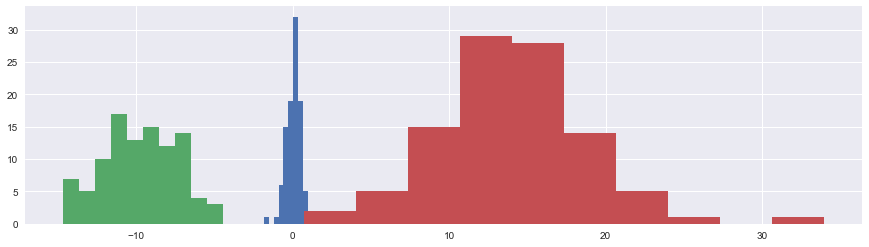

In [31]:
x1 = 0.5 * np.random.randn(100)
x2 = 2.5 * np.random.randn(100) - 10
x3 = 5 * np.random.randn(100) + 15


plt.hist(x1);
plt.hist(x2);
plt.hist(x3);

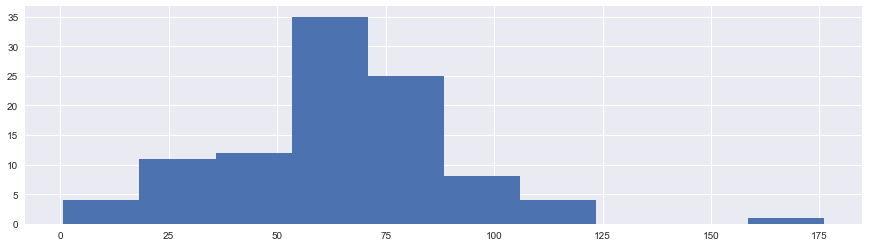

In [32]:
y = 2 * x1 + 0.5 * x2 + 5 * x3 + (10 * np.random.randn(100))
y = y.reshape(100, 1)
plt.hist(y);

In [33]:
X = np.array([x1, x2, x3]).T
X.shape

(100, 3)

In [34]:
# Predict y using the full set of features
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
y_hat = lin_reg.predict(X)

[-5.05793358] [[5.0077248  0.25917618 5.08006814]]


In [35]:
X_i = np.array([x1, x2]).T
X_i.shape

(100, 2)

In [36]:
# Residual from predicting x3 on x1, x2 is the additional 
# information not already present in the selected features
lin_reg.fit(X_i, x3)
print(lin_reg.intercept_, lin_reg.coef_)
u = x3 - lin_reg.predict(X_i)

16.37588269778778 [-1.00503835  0.23357978]


In [37]:
# Predict y using only features x1, x2
lin_reg.fit(X_i, y)
print(lin_reg.intercept_, lin_reg.coef_)
y_i_hat = lin_reg.predict(X_i)

[78.1326663] [[-0.09793853  1.44577737]]


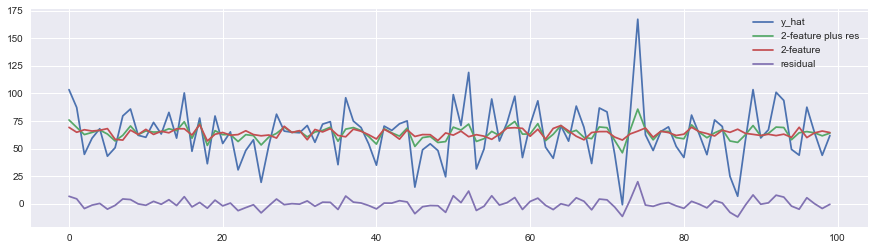

In [38]:
plt.plot(y_hat, label='y_hat');
plt.plot(y_i_hat.reshape(-1) + u, label='2-feature plus res');
plt.plot(y_i_hat.reshape(-1), label='2-feature')
plt.plot(u, label='residual');
plt.legend();

In [42]:
df = pd.DataFrame({'a': [1,2,3], 'b': [2,3,4], 'c':[5,9,1]})
df

,a,b,c
0,1,2,5
1,2,3,9
2,3,4,1


In [44]:
df.sum(axis=1)

0     8
1    14
2     8
dtype: int64